# MSc in Data Science, AUEB

# Numerical Optimization and Large Scale Linear Algebra, Assignment 3

## Vasileios Ilias Drouzas

## Student ID: f3352301

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the data

In [2]:
path = 'C:/Users/Drogias/Desktop/MSc Data Science AUEB/2nd semester/Numerical optimization/Assignments/3/'

data = pd.read_excel(path + 'data.xlsx', header = None, sheet_name = None)

X_train = data['azip']              #holds training images
y_train = data['dzip']              #holds digits

X_test = data['testzip']
y_test = data['dtest']


C:\Users\Drogias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\Drogias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\Drogias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\Drogias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will

In [3]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,1697,1698,1699,1700,1701,1702,1703,1704,1705,1706
0,-1.000,-1.000,-1.000,-1.0,-1.000,-1.0,-1.000,-1.0,-1.000,-1.0,...,-1.000,-1.000,-1.000,-1.0,-1.0,-1.000,-1.0,-1.000,-1.0,-1.000
1,-1.000,-1.000,-1.000,-1.0,-1.000,-1.0,-1.000,-1.0,-1.000,-1.0,...,-1.000,-1.000,-1.000,-1.0,-1.0,-1.000,-1.0,-1.000,-1.0,-1.000
2,-1.000,-1.000,-1.000,-1.0,-1.000,-1.0,-1.000,-1.0,-1.000,-1.0,...,-1.000,-1.000,-1.000,-1.0,-1.0,-1.000,-1.0,-1.000,-1.0,-1.000
3,-1.000,-0.813,-1.000,-1.0,-1.000,-1.0,-0.830,-1.0,-1.000,-1.0,...,-1.000,-0.567,-1.000,-1.0,-1.0,-1.000,-1.0,-1.000,-1.0,-1.000
4,-1.000,-0.671,-1.000,-1.0,-1.000,-1.0,0.442,-1.0,-1.000,-1.0,...,-0.986,-0.064,-1.000,-1.0,-1.0,-1.000,-1.0,-0.948,-1.0,-0.338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,-0.991,0.126,-0.179,-1.0,0.439,-1.0,-1.000,-1.0,-0.811,-1.0,...,-1.000,-1.000,-0.633,-1.0,-1.0,-0.974,-1.0,-1.000,-1.0,-1.000
252,-1.000,-0.095,-1.000,-1.0,-0.199,-1.0,-1.000,-1.0,-1.000,-1.0,...,-1.000,-1.000,-0.782,-1.0,-1.0,-1.000,-1.0,-1.000,-1.0,-1.000
253,-1.000,-0.671,-1.000,-1.0,-0.883,-1.0,-1.000,-1.0,-1.000,-1.0,...,-1.000,-1.000,-1.000,-1.0,-1.0,-1.000,-1.0,-1.000,-1.0,-1.000
254,-1.000,-0.828,-1.000,-1.0,-1.000,-1.0,-1.000,-1.0,-1.000,-1.0,...,-1.000,-1.000,-1.000,-1.0,-1.0,-1.000,-1.0,-1.000,-1.0,-1.000


In [4]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006
0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.0,-1.000,-1.0,-1.0,...,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.0
1,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.0,-1.000,-1.0,-1.0,...,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.0
2,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.0,-1.000,-1.0,-1.0,...,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.0
3,-1.0,-1.0,-0.593,-1.0,-1.000,-1.000,-1.0,-1.000,-1.0,-1.0,...,-1.000,-0.885,-0.980,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.0
4,-1.0,-1.0,0.700,-1.0,-1.000,-1.000,-1.0,-1.000,-1.0,-1.0,...,-0.766,-0.280,0.078,-1.0,-1.0,-1.0,-1.0,-0.031,-0.534,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,-1.0,-1.0,-1.000,-1.0,-0.867,-0.641,-1.0,-0.308,-1.0,-1.0,...,-1.000,-0.400,-0.978,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.0
252,-1.0,-1.0,-1.000,-1.0,-1.000,-0.812,-1.0,-1.000,-1.0,-1.0,...,-1.000,-0.998,-0.109,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.0
253,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.0,-1.000,-1.0,-1.0,...,-1.000,-1.000,0.360,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.0
254,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.0,-1.000,-1.0,-1.0,...,-1.000,-1.000,-0.381,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.0


In [5]:
y_train

,0,1,2,3,4,5,6,7,8,9,...,1697,1698,1699,1700,1701,1702,1703,1704,1705,1706
0,6,5,4,7,3,6,3,1,0,1,...,8,0,5,1,9,8,9,7,9,8


In [6]:
y_test

,0,1,2,3,4,5,6,7,8,9,...,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006
0,9,6,3,6,6,0,0,0,6,9,...,7,5,2,0,4,3,9,4,0,1


## Plot digits

We start by plotting some sample digits for demonstration reasons.

In [7]:
def plotImage(digit):
    number = digit.values
    
    number = number - min(number) * np.ones(len(number))          #Normalization to [0,20]
    number = (20 / max(number)) * number

    plt.imshow(number.reshape(16,16), cmap = 'gray')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

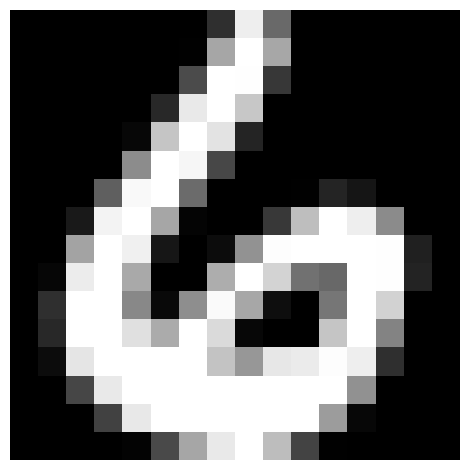

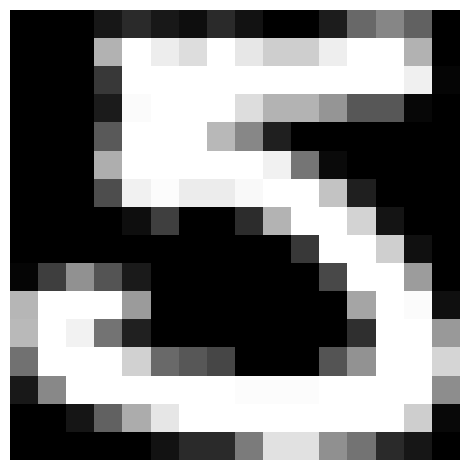

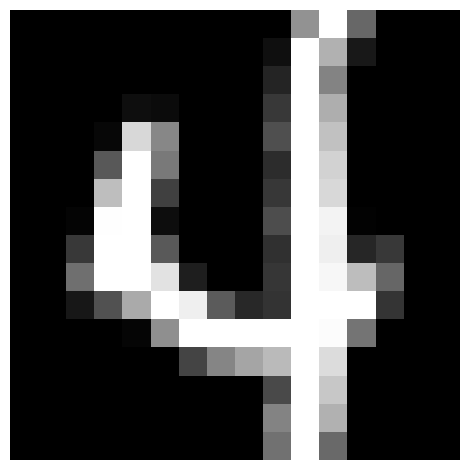

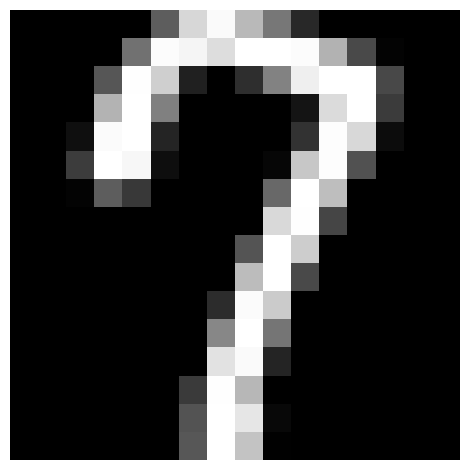

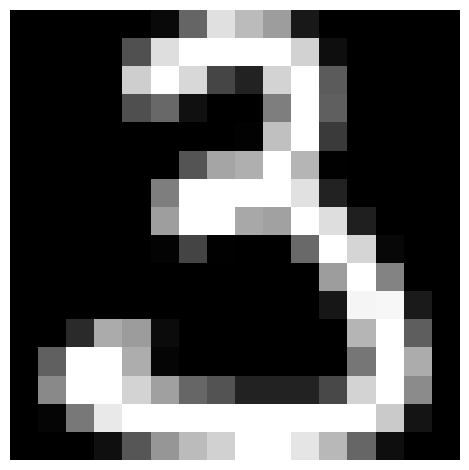

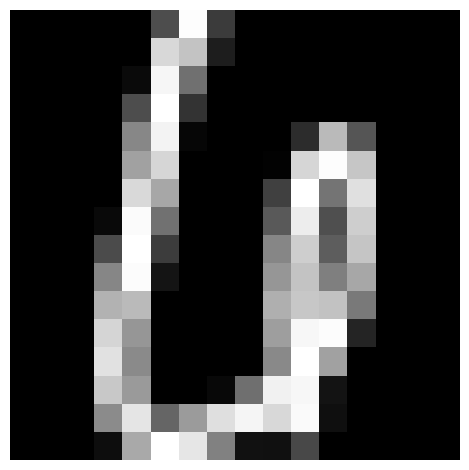

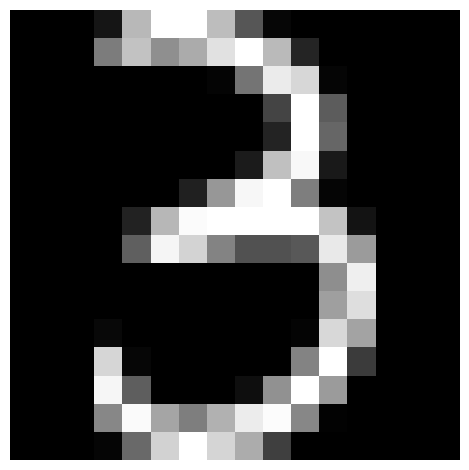

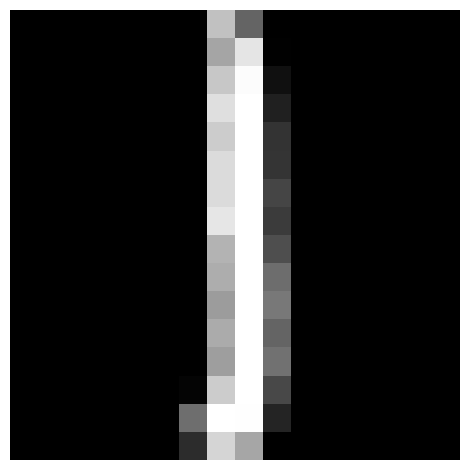

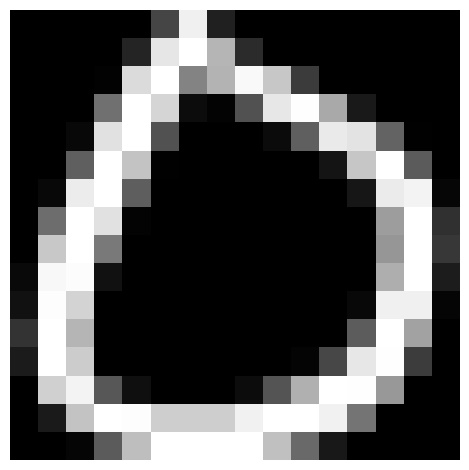

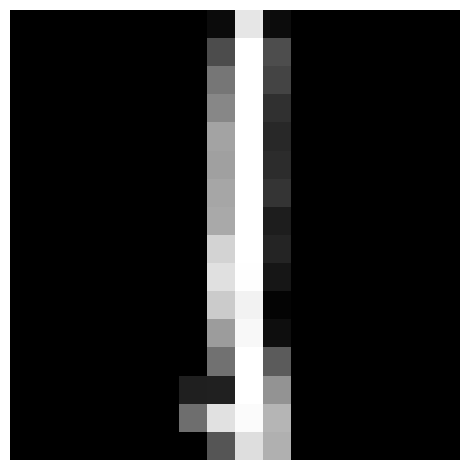

In [8]:
for i in range (10):
    plotImage(X_train.iloc[:,i])

In [9]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


## Approach #1: A simple classification algorithm.

Following the example from par. 10.1, we will use a simple classification algorithm, which calculates the mean of each class and classifies every test number to the class with the smallest distance.

In [10]:
y_train_np = np.array(y_train)
means = np.zeros((256,10))
for label in np.unique(y_train):
     means[:, label] = X_train.loc[:, y_train_np.flatten() == label].mean(axis=1)
    



In [11]:
means

array([[-1.        , -1.        , -0.98679703, ..., -0.98503012,
        -0.99928472, -1.        ],
       [-0.99752351, -1.        , -0.94129208, ..., -0.9004759 ,
        -0.97407639, -1.        ],
       [-0.98700313, -1.        , -0.87657921, ..., -0.77714458,
        -0.91774306, -1.        ],
       ...,
       [-0.99873354, -1.        , -0.77507426, ..., -1.        ,
        -0.99329861, -0.98537879],
       [-1.        , -1.        , -0.85166832, ..., -1.        ,
        -0.99998611, -0.99482576],
       [-1.        , -1.        , -0.94846535, ..., -1.        ,
        -1.        , -1.        ]])

In [12]:
def digit_clf(x, means):
    distances = np.linalg.norm(means - x[:, np.newaxis], axis=0)        #distance from input x to each mean
    return np.argmin(distances)                                         #return the min distance


In [13]:
predictions = [digit_clf(x, means) for x in X_test.T.to_numpy()]    #classification in the test set

accuracy = np.mean(predictions == y_test.to_numpy())                     #find the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.8086696562032885


As we expected, the simple classification algorithm returned fair results (accuracy of 80.7%, "can be considered reasonably accurate", as noted in par.10.1, page 115).

## Approach #2: Classification using SVD bases.

The first task we have is to find the SVD of each digit:

In [14]:
#Initialize arrays to store U,S,V matrices
U = []                                 
S = []                                
V = []                                 

for label in np.unique(y_train):
    
    u, s, v = np.linalg.svd(X_train.loc[:, y_train_np.flatten() == label])      #apply SVD
    
    #update U,S,V
    U.append(u)                                                          
    S.append(s)
    V.append(v)

print("U shape (Digit 0):", U[0].shape)
print("S shape (Digit 0):", S[0].shape)
print("V shape (Digit 0):", V[0].shape)



U shape (Digit 0): (256, 256)
S shape (Digit 0): (256,)
V shape (Digit 0): (319, 319)


Following the example from Figure 10.5, we will print the singular values for the digit 3 and the first three singular images:

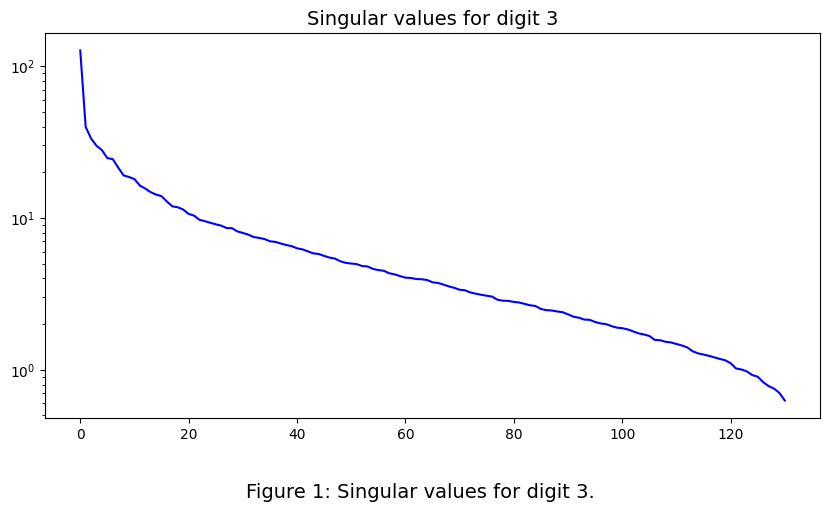

In [15]:
plt.figure(figsize = (10,5))
plt.plot(S[3], color='blue')
plt.title('Singular values for digit 3', fontsize = 14)
plt.yscale('log')
txt="Figure 1: Singular values for digit 3."
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=14)
plt.show()

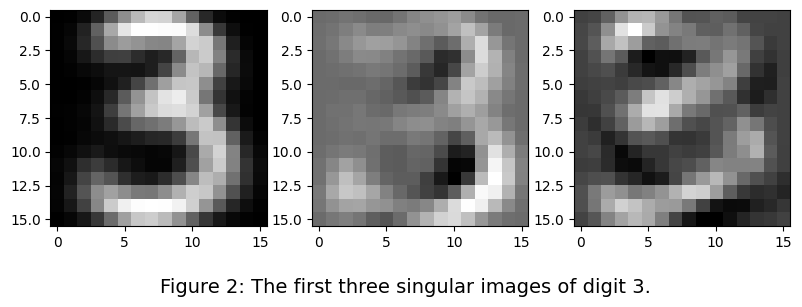

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(8,5))

for i, tr in enumerate(axes):
    tr.imshow(U[3][:,i].reshape(16,16), cmap='gray')

fig.tight_layout()
txt="Figure 2: The first three singular images of digit 3. "
plt.figtext(0.5, 0.15, txt, wrap=True, horizontalalignment='center', fontsize=14)
plt.show()


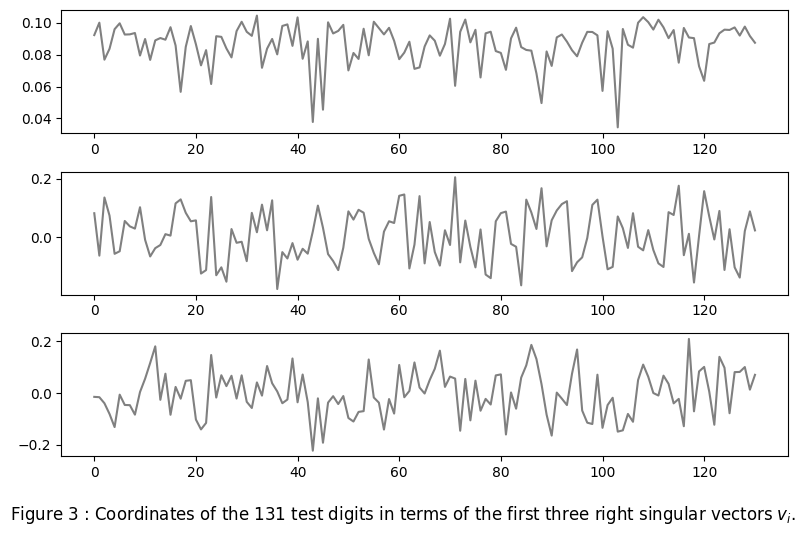

In [17]:
fig, axes = plt.subplots(3, 1, figsize=(8,5))

for i, tr in enumerate(axes.reshape(-1)):
    tr.plot(V[3][i], color='gray')

fig.tight_layout()
txt="Figure 3 : Coordinates of the 131 test digits in terms of the first three right singular vectors $v_{i}$." 
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

## Least squares classification.

Now, we will proceeed by taking advantage of the $U$ matrix of each class to implement the least squares classification algorithm.
Following the example from par. 10.2, pages 116-117, the SVD basis classification algorithm will be based on three assumptions:

1) Each digit (in the training set and the test set) is well characterized by a few of the first singular images of its own kind. 
2)  An expansion in terms of the first few singular images discriminates well between the different classes of digits.
3) If an unknown digit can be better approximated in one particular basis of singular images, the basis of 3’s say, than in the bases of the other classes, then it is likely that the unknown digit is a 3.

The Least Squares classification algorithm will use the relative residual vector as a measure, which is given by:  $$ \frac {\lVert (I-U_{k}U_{k}^{T})z \rVert_{2}}{\lVert z \rVert_{2}} $$

In [18]:
def ls_clf(data, U, num_bases):
    I = np.eye(256)                                                #Matrix I
    preds = []                                                     #Initialize list for predictions
    
    for img in range(len(data.loc[0,:])):                          #Iterate through the images
        residuals = []
        
        for i in range(10):                                        #iterate through the digits
            U_k = U[i][:, 0:num_bases]
            res = np.linalg.norm(np.dot(I - np.dot(U_k, U_k.T), data[img])) /np.linalg.norm(data[img])  #relative residual vector
            residuals.append(res)
        
        pred = np.argmin(residuals)
        
        preds.append(pred)                                   #update predictions
        predictions_np = np.array(preds)
        
    return predictions_np

In [19]:
!pip install tabulate

### Specific Task 1. 

Tune the algorithm for accuracy of classification. Give a table or 
graph of the percentage of correctly classified digits as  
function of the number of basis vectors.

In [29]:
from tabulate import tabulate

table_data = []
max_accuracy = -1
max_accuracy_bases = None
accuracies = []
alg_predictions = []
for num_bases in range(5,21):
    prediction = ls_clf(X_test, U, num_bases)                        #get the predictions
    accuracy = np.mean(y_test == prediction)                         #calculate the accuracy
    accuracies.append(round(accuracy * 100, 2))                       #store in percentage format
    alg_predictions.append(prediction)
    if (accuracy > max_accuracy):
        max_accuracy = accuracy                                       #keep the best accuracy
        max_accuracy_bases = num_bases

    table_data.append([num_bases, round(accuracy * 100, 2)])

In [21]:
headers = ["Number of Bases", "Accuracy (%)"]
print(tabulate(table_data, headers=headers, tablefmt="grid"))
print("\n")
print("The maximum accuracy of", round(max_accuracy * 100, 2), "%, was achieved using", max_accuracy_bases, "singular vectors.")

+-------------------+----------------+
|   Number of Bases |   Accuracy (%) |
+===================+================+
|                 5 |          90.28 |
+-------------------+----------------+
|                 6 |          90.53 |
+-------------------+----------------+
|                 7 |          91.68 |
+-------------------+----------------+
|                 8 |          92.03 |
+-------------------+----------------+
|                 9 |          92.63 |
+-------------------+----------------+
|                10 |          93.17 |
+-------------------+----------------+
|                11 |          93.22 |
+-------------------+----------------+
|                12 |          93.57 |
+-------------------+----------------+
|                13 |          93.62 |
+-------------------+----------------+
|                14 |          93.92 |
+-------------------+----------------+
|                15 |          94.12 |
+-------------------+----------------+
|                16 |    

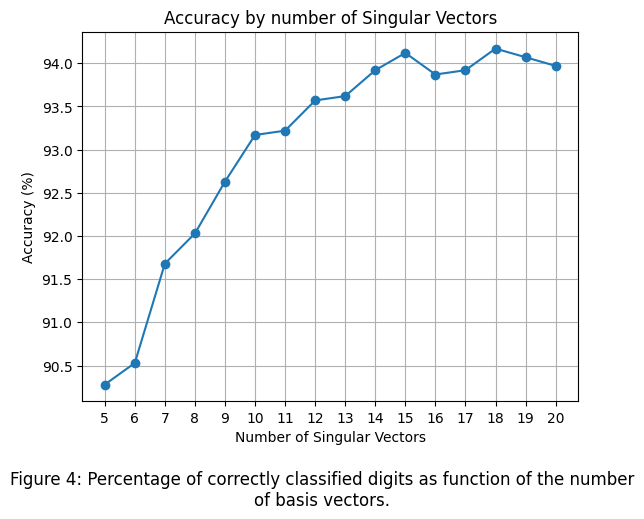

In [22]:
bases = [i for i in range(5, 21)]

plt.plot(bases, accuracies, marker='o')
plt.title('Accuracy by number of Singular Vectors')
plt.xlabel('Number of Singular Vectors')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.xticks(bases)
txt="Figure 4: Percentage of correctly classified digits as function of the number of basis vectors." 
plt.figtext(0.5, -0.1, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

### Specific Task 2.

Check if all digits are equally easy or difficult to classify. Also
look at some of the difficult ones, and see that in many cases
they are very badly written.

Here we will use the optimal number of singular vectors (18). We will make predictions to see the classification of the digits and identify the ones that are more difficult to be classified.

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = ls_clf(X_test, U, 18)
print("----------------- Classification report ----------------------")
print(classification_report(y_test.loc[0,:], predictions))

----------------- Classification report ----------------------
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       359
           1       0.97      0.98      0.98       264
           2       0.96      0.90      0.93       198
           3       0.91      0.90      0.91       166
           4       0.91      0.93      0.92       200
           5       0.93      0.88      0.91       160
           6       0.99      0.96      0.97       170
           7       0.95      0.96      0.95       147
           8       0.94      0.92      0.93       166
           9       0.91      0.93      0.92       177

    accuracy                           0.94      2007
   macro avg       0.94      0.94      0.94      2007
weighted avg       0.94      0.94      0.94      2007



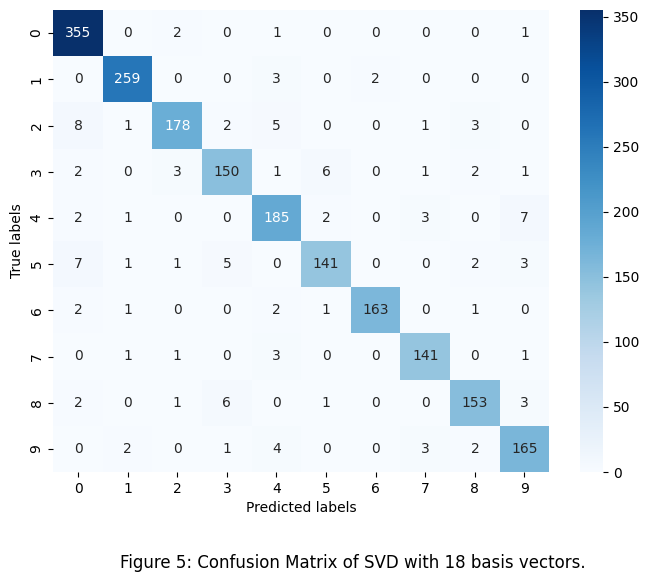

In [24]:
conf_matrix = confusion_matrix(y_test.loc[0,:], predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
txt="Figure 5: Confusion Matrix of SVD with 18 basis vectors." 
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

From the confusion matrix we can see that the most difficult digits to classify are 3 and 5, while 0 and 1 are the easiest ones. Digit 3 is often mistakenly classified as 5 (probably because of it being badly written) and 5 is also often misclassified as 1. Let's proceed by choosing randomly some mistakenly classified digits and see if they are badly written:

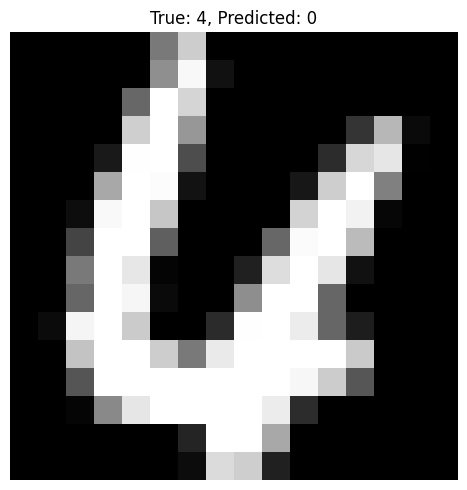

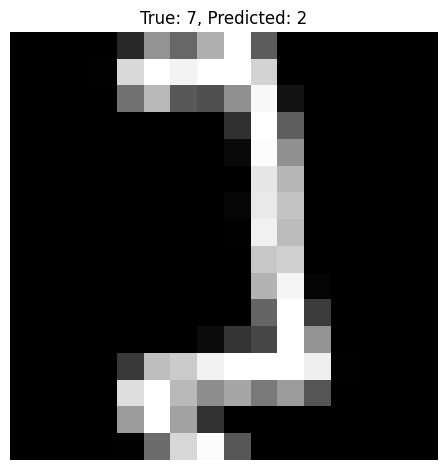

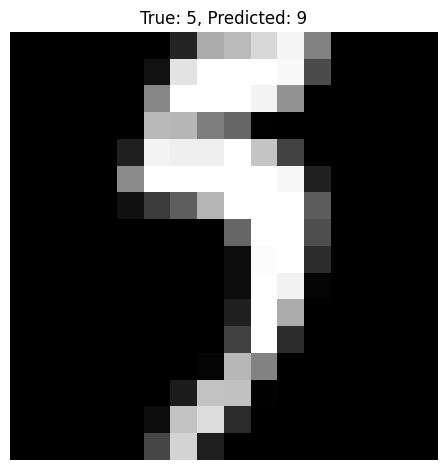

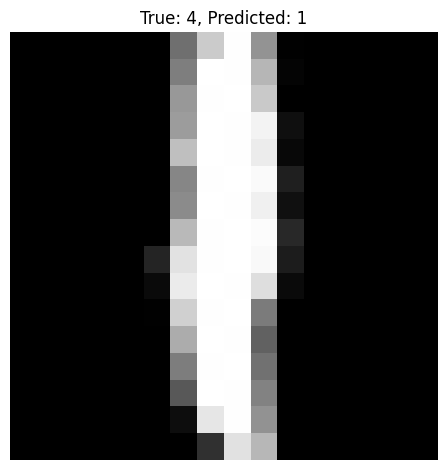

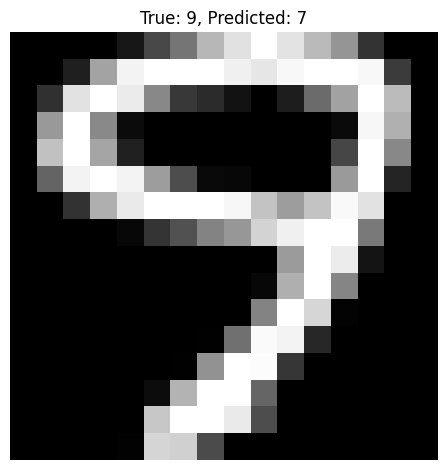

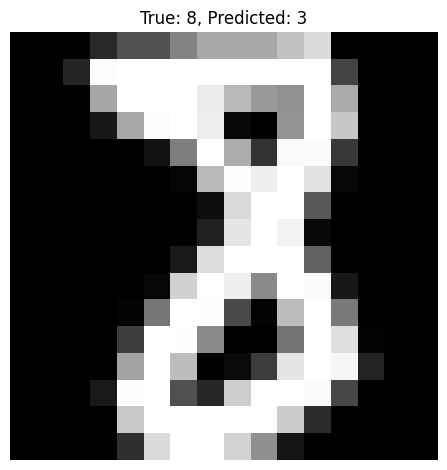

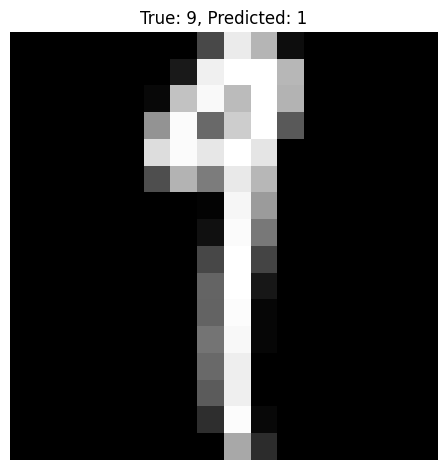

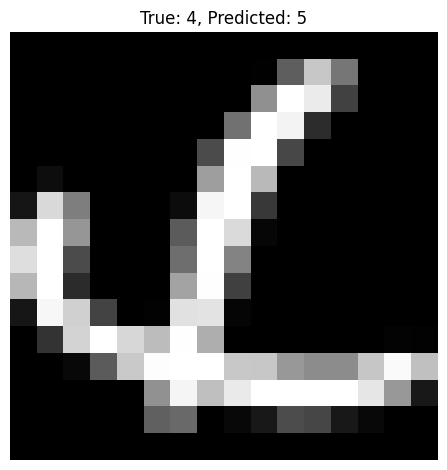

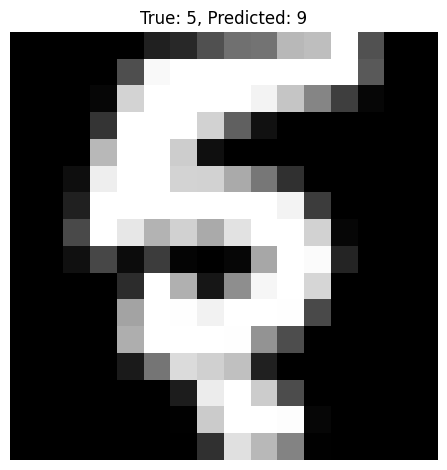

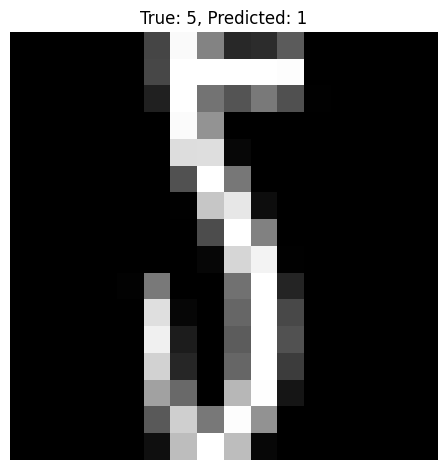

In [25]:
misclassified_indexes = np.where(y_test.loc[0,:] != predictions)[0]                 #find all the misclassified indexes

num_samples = 10                              
random_misclassified_indexes = np.random.choice(misclassified_indexes, num_samples, replace=False)     #pick 10 of them randomly


plt.figure(figsize = (12,5))
for i, idx in enumerate(random_misclassified_indexes):
    
    plt.title(f'True: {y_test.loc[0, idx]}, Predicted: {predictions[idx]}')
    plotImage(X_test.iloc[:, idx])
    
plt.show()


As we can see, most of these are indeed badly written. Note that there are cases where they are not distinctable (not even by humans(!) ).

### Specific Task 3.

Check the singular values of the different classes. Is it motivated
to use different numbers of basis vectors for different
classes? If so, perform a few experiments to find out if it
really pays off to use fewer basis vectors in one or two of the
classes.

We will start by plotting the first 20 singular values of each digit:

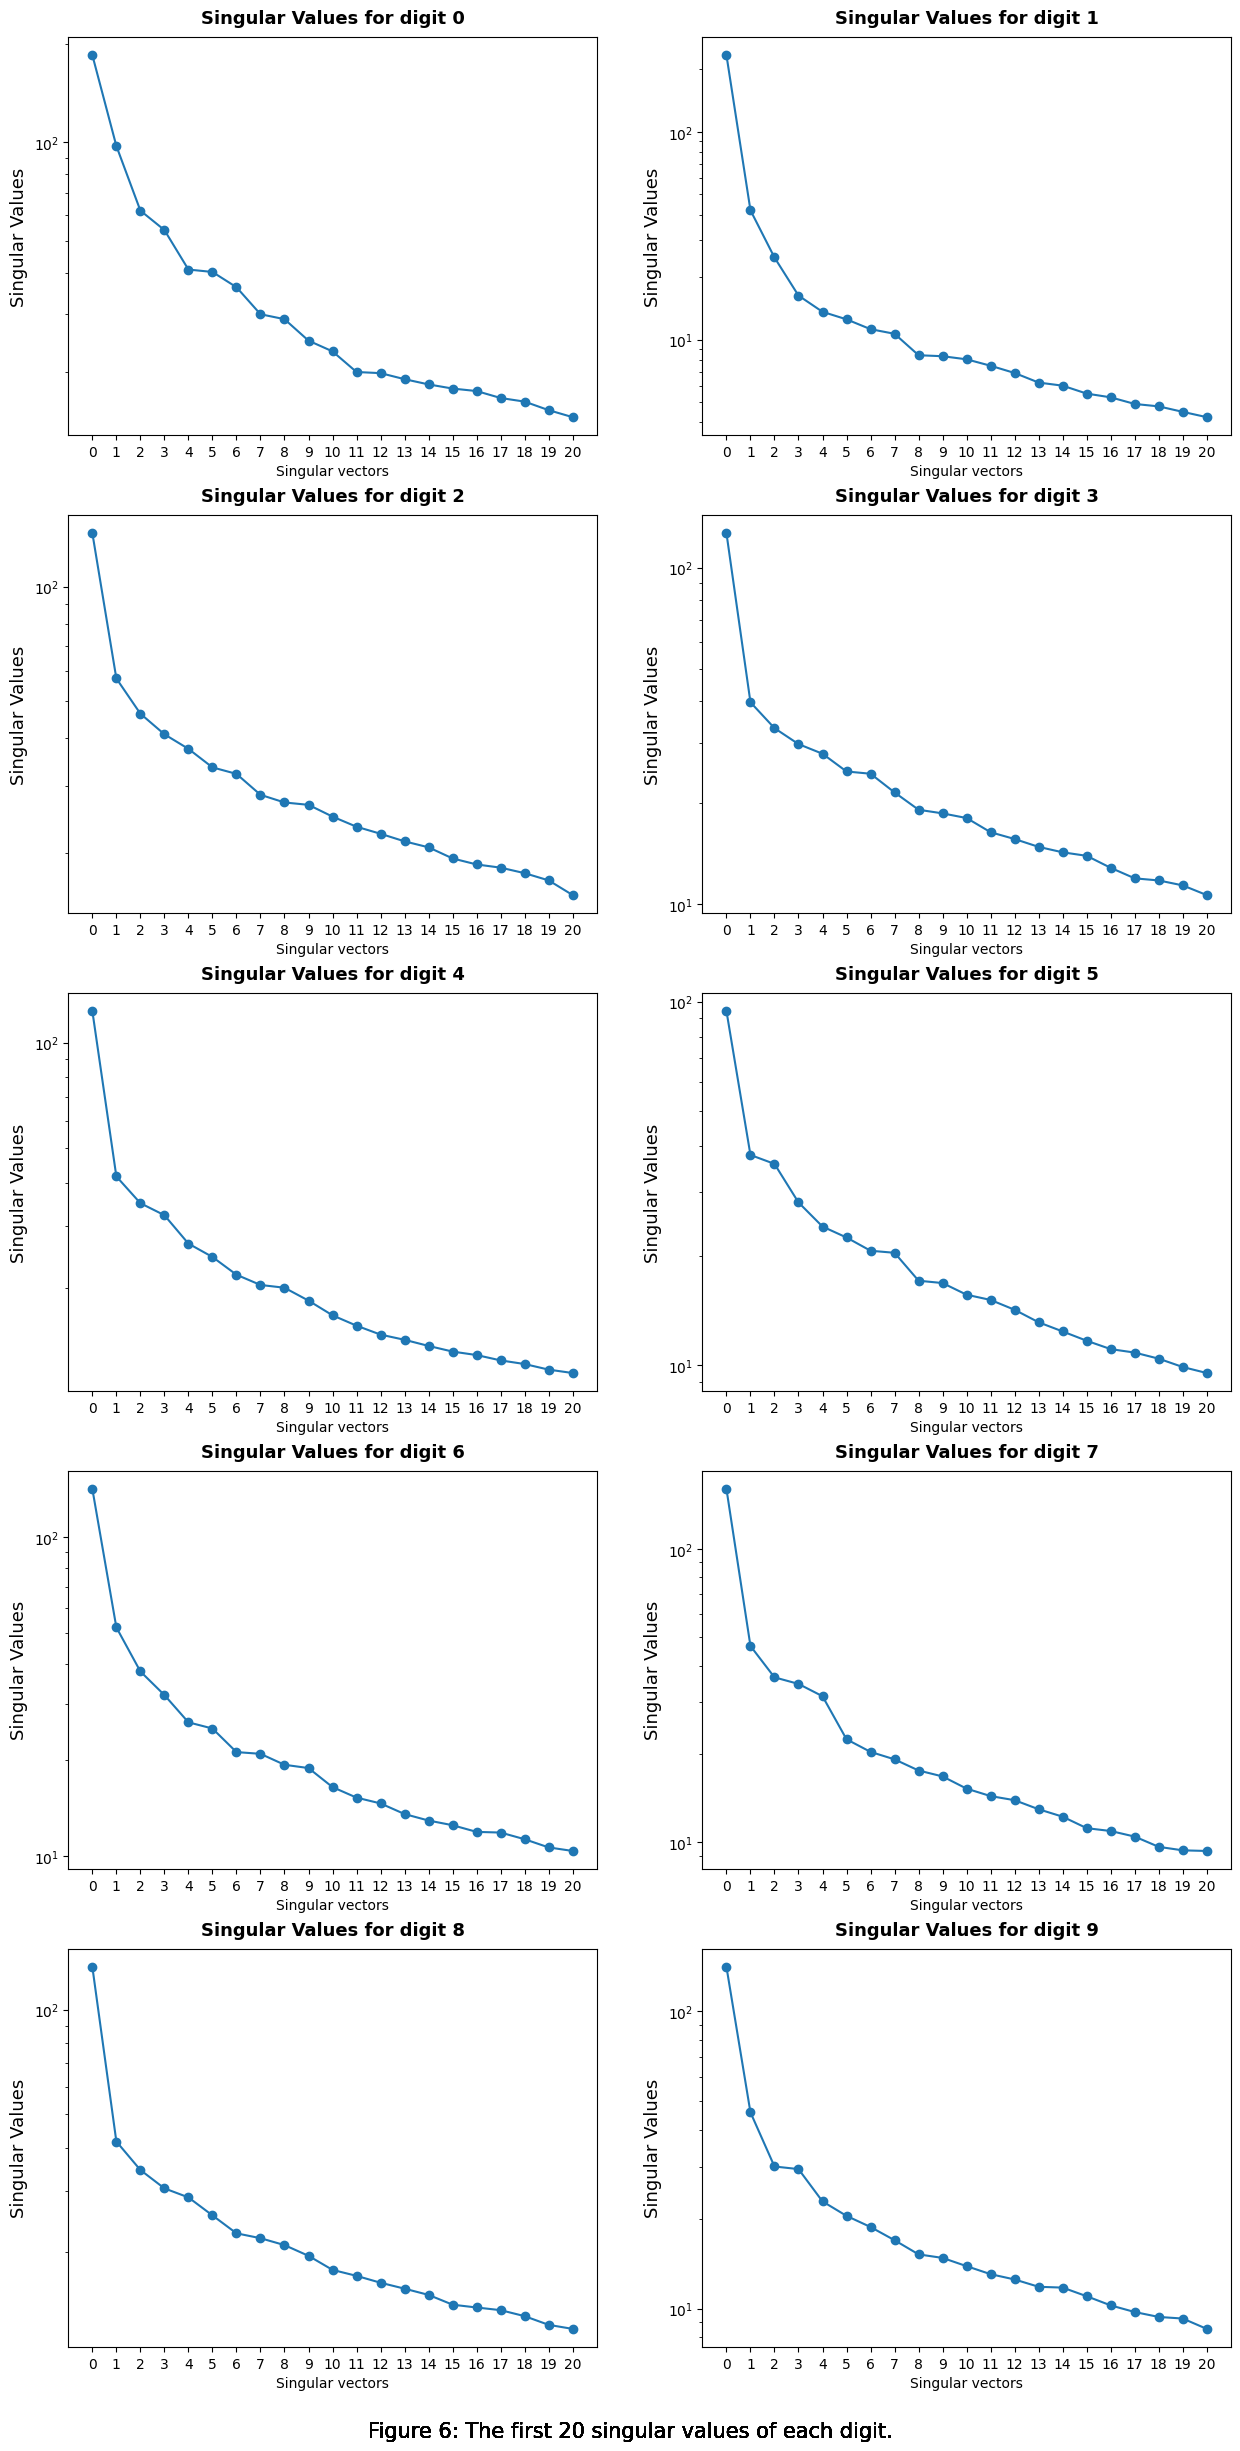

In [26]:
plt.figure(figsize=(15,30))

for i in range(10):
    plt.subplot(5,2,i+1)
    plt.plot(S[i][0:21], marker='o')
    plt.yscale('log')
    plt.title('Singular Values for digit '+ str(i) ,fontsize=13,weight="bold",pad=10)
    plt.xticks(np.arange(0, 21, 1))
    plt.ylabel('Singular Values' ,fontsize=13)
    plt.xlabel('Singular vectors')
    txt="Figure 6: The first 20 singular values of each digit." 
    plt.figtext(0.5, 0.08, txt, wrap=True, horizontalalignment='center', fontsize=15)

In [30]:
from sklearn.metrics import f1_score

for j in range(10):
    print("Digit " + str(j) + ":")
    for i in range(0,16):
        print("F1-score using", i+5, "singular vectors:", f1_score(y_test.loc[0,:] == j, alg_predictions[i] == j))
    print("\n")

Digit 0:
F1-score using 5 singular vectors: 0.9538043478260869
F1-score using 6 singular vectors: 0.9496598639455782
F1-score using 7 singular vectors: 0.9577080491132334
F1-score using 8 singular vectors: 0.9590163934426229
F1-score using 9 singular vectors: 0.965893587994543
F1-score using 10 singular vectors: 0.96448087431694
F1-score using 11 singular vectors: 0.9645776566757494
F1-score using 12 singular vectors: 0.9685362517099864
F1-score using 13 singular vectors: 0.9632653061224489
F1-score using 14 singular vectors: 0.9673024523160764
F1-score using 15 singular vectors: 0.9633649932157394
F1-score using 16 singular vectors: 0.962059620596206
F1-score using 17 singular vectors: 0.9646739130434783
F1-score using 18 singular vectors: 0.9633649932157394
F1-score using 19 singular vectors: 0.9633649932157394
F1-score using 20 singular vectors: 0.962059620596206


Digit 1:
F1-score using 5 singular vectors: 0.9603024574669187
F1-score using 6 singular vectors: 0.9681050656660413
F1

In most cases, we catch the best f1-score in 18 singular vectors. Even in the cases where this is not true, the differences of the F1 scores are so low that there is no significant advantage to use a different number of basis vectors.

### Optional Task: Two-stage algorithm with SVD

In order to save operations in the test phase, implement a two-stage
algorithm: In the first stage compare the unknown digit only to the
first singular vector in each class. If for one class the residual is
significantly smaller than for the others, classify as that class.
Otherwise perform the algorithm above. Is it possible to get as
good results for this variant? How frequently is the second stage
unnecessary?

In [31]:
def two_stage_algorithm(data, U, threshold):
    I = np.eye(256)
    predictions = []                                    #initialize predictions
    count = 0                                           #counter to check how many times second stage is used

    for img_index in range(len(data.columns)):          #iterate through the images
        min_residual = float('inf')                     #initialize the min residual
        min_residual_class = None                       #initialize the min residual class

       
        for digit in range(10):  
            U_k = U[digit][:, 0]                     #first singular vector
            residual = np.linalg.norm(np.dot(I - np.outer(U_k, U_k), data[img_index])) / np.linalg.norm(data[img_index])

            if residual < min_residual:
                min_residual = residual                      #update the min residual
                min_residual_class = digit

        
        second_residuals = []
        for digit in range(10):  
            if digit != min_residual_class:                              #don't take the smallest 
                U_k = U[digit][:, :2]  
                residual = np.linalg.norm(np.dot(I - np.dot(U_k, U_k.T), data[img_index])) / np.linalg.norm(data[img_index])
                second_residuals.append(residual)

        if len(second_residuals) > 0 and min_residual < min(second_residuals) - threshold:
            predictions.append(min_residual_class)                       #classify as the class with smallest residual
            count = count + 1                                            #update counter
        else:
            residuals_all = []

            for digit in range(10):  
                U_k = U[digit][:, :10]  
                residual = np.linalg.norm(np.dot(I - np.dot(U_k, U_k.T), data[img_index])) / np.linalg.norm(data[img_index])
                residuals_all.append(residual)

            predictions.append(np.argmin(residuals_all))                 #classify using the method above

    return count, predictions


In [32]:
two_stage_count, preds_two_stage = two_stage_algorithm(X_test, U, threshold = 0.1)
print(two_stage_count, "times out of", X_test.shape[1], "used the second stage.")
print("\n")
print("-------Classification Report-------")
print(classification_report(y_test.values.flatten(), preds_two_stage))

822 times out of 2007 used the second stage.


-------Classification Report-------
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       359
           1       0.95      0.99      0.97       264
           2       0.95      0.90      0.93       198
           3       0.87      0.88      0.87       166
           4       0.93      0.92      0.92       200
           5       0.89      0.87      0.88       160
           6       0.98      0.94      0.96       170
           7       0.93      0.94      0.94       147
           8       0.93      0.87      0.90       166
           9       0.91      0.94      0.92       177

    accuracy                           0.93      2007
   macro avg       0.93      0.92      0.93      2007
weighted avg       0.93      0.93      0.93      2007



The results with the two-stage algorithm are found to be similar to the original results, while the second stage was used less than half the times (822 out of 2007). This implies that the second stage is not necessary at all costs.